# Heston Model Simulation Demo

This notebook demonstrates how to use the custom `Heston` class to simulate asset price paths using the Heston stochastic volatility model.

We illustrate both:
- The one-dimensional case (single asset)
- The multidimensional case (multiple assets with correlated volatility)


In [1]:
import sys
from pathlib import Path

# Add the path to import the custom Heston model
sys.path.append(str(Path().resolve().parents[0] / "src"))

from models.Heston import Heston
import numpy as np
import matplotlib.pyplot as plt


## One-dimensional Heston model

We simulate 10 paths of a single asset whose volatility follows the Heston dynamics.


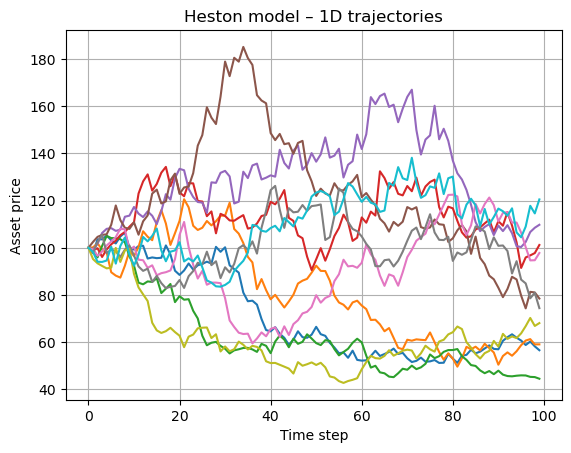

In [2]:
# Create the Heston model
heston = Heston(v0=0.2, r=0.03, kappa=0.02, theta=0.4, sigma=0.1, rho=0.4)

# Generate 10 trajectories
S = heston.generate_trajectories(S0=100, T=1, N=100, n_paths=10)

# Plot the paths
for i in range(10):
    plt.plot(S[:, i])
plt.title("Heston model – 1D trajectories")
plt.xlabel("Time step")
plt.ylabel("Asset price")
plt.grid(True)
plt.show()


## Multidimensional Heston model

Now we consider a 2-asset case. Each asset follows its own Heston dynamics with separate parameters for volatility (`v0`, `kappa`, `theta`, `sigma`).

The correlation matrix `rho` captures the dependencies between:
- asset prices (spot-spot),
- volatilities (vol-vol),
- and cross terms (spot-vol and vol-spot).

It is a **4x4 symmetric matrix** since we have 2 assets and each one has 2 dimensions: `[S₁, S₂, V₁, V₂]`.

We can view it as a block matrix:

$$
\rho =
\begin{bmatrix}
\text{spot-spot} & \text{spot-vol} \\
\text{vol-spot} & \text{vol-vol}
\end{bmatrix}
\quad \text{where each block is 2x2}
$$

- **Top-left (spot-spot)**: correlation between asset prices  
- **Bottom-right (vol-vol)**: correlation between variances  
- **Top-right / Bottom-left (spot-vol / vol-spot)**: correlation between prices and variances

This structure allows for rich joint dynamics between multiple assets.



In [3]:
heston2 = Heston(
    v0=np.array([0.2, 0.1]),
    r=0.03,
    kappa=np.array([0.02, 0.1]),
    theta=np.array([0.4, 0.3]),
    sigma=np.array([0.1, 0.2]),
    rho=np.array([
        [1.00, 0.30, 0.20, 0.10],
        [0.30, 1.00, 0.40, 0.25],
        [0.20, 0.40, 1.00, 0.35],
        [0.10, 0.25, 0.35, 1.00]
    ])
)

# Simulate 2D asset prices
S2 = heston2.generate_trajectories(S0=np.array([100, 80]), T=1, N=100, n_paths=10)


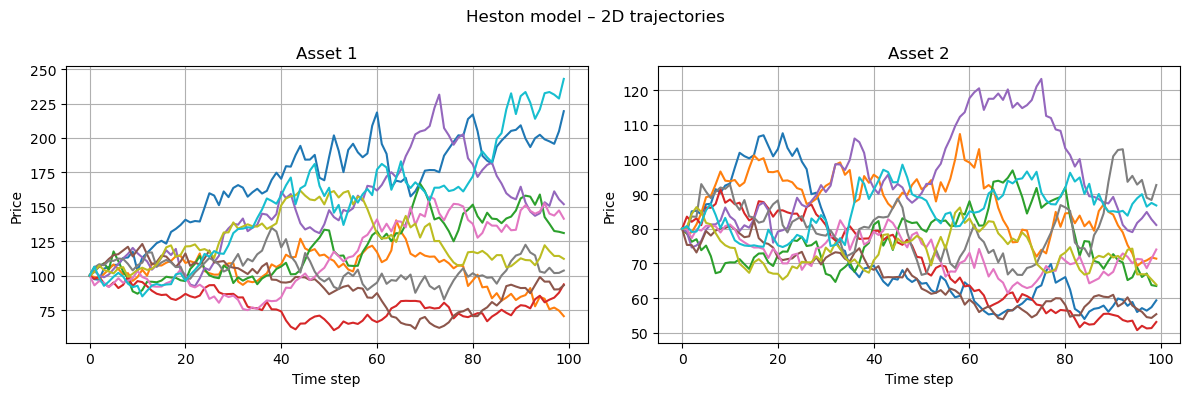

In [4]:
# Plot asset 1 and asset 2 trajectories
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i in range(10):
    axs[0].plot(S2[:, i, 0])
    axs[1].plot(S2[:, i, 1])

axs[0].set_title("Asset 1")
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("Price")

axs[1].set_title("Asset 2")
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("Price")

for ax in axs:
    ax.grid(True)

plt.suptitle("Heston model – 2D trajectories")
plt.tight_layout()
plt.show()
